# Practical Session 3: Classification

# Mohamad Jawad ABOU ALEIWI

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1) Datasets description:

# 1.3) Loading the data:

**Pima Dataset**

In [3]:
# Load the data of pima dataset
pima = np.load("pima.npz")
print(pima.files)

['xall', 'yall', 'varnames']


In [4]:
# Store in memory
x1 = pima['xall']
y1 = pima['yall']
varnames = pima['varnames']

The predictor variables included are:

• **Pregnancies** Number of times pregnant.

• **Glucose** Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

• **BloodPressure** Diastolic blood pressure (mm Hg).

• **SkinThickness** Triceps skin fold thickness (mm).

• **Insulin** 2-Hour serum insulin (mu U/ml).

• **BMIBody** mass index (weight in kg/(height in m)²).

• **DiabetesPedigreeFunction** Diabetes pedigree function.

• **Age** Age (years).

In [5]:
# Create a pandas dataframe
pima = pd.DataFrame(list(np.concatenate((x1, y1.reshape(y1.shape[0],1)), axis=1)), columns=list(varnames)+['Outcome'])

In [6]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1.0
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1.0
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1.0
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1.0
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1.0
...,...,...,...,...,...,...,...,...,...
704,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,-1.0
705,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,-1.0
706,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,-1.0
707,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


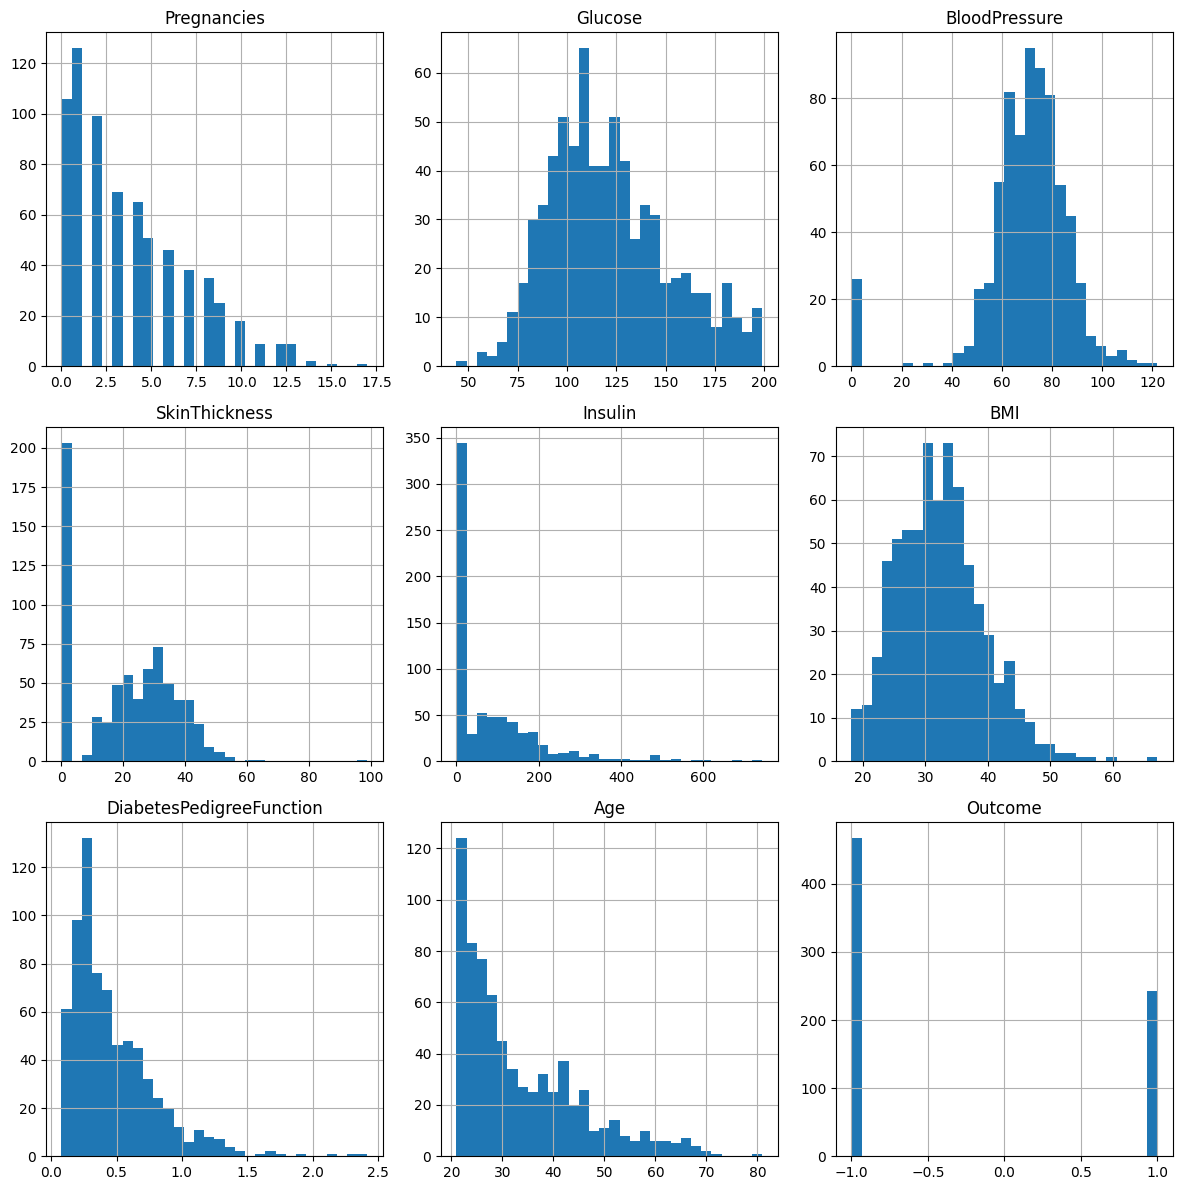

In [7]:
# Visualization of the pima dataset
pima.hist(figsize=(12,12), bins=30)
pl.tight_layout()

In [8]:
# Compute the correlation matrix
corr = pima.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116392,0.148910,-0.055089,-0.050627,0.027990,-0.024093,0.548995,0.220255
Glucose,0.116392,1.000000,0.133078,0.075631,0.319234,0.236256,0.133981,0.249257,0.499845
BloodPressure,0.148910,0.133078,1.000000,0.194635,0.080555,0.203241,0.025362,0.219209,0.056029
SkinThickness,-0.055089,0.075631,0.194635,1.000000,0.438949,0.393213,0.174557,-0.130274,0.055354
Insulin,-0.050627,0.319234,0.080555,0.438949,1.000000,0.198169,0.190344,-0.078810,0.113659
BMI,0.027990,0.236256,0.203241,0.393213,0.198169,1.000000,0.147866,0.019568,0.311803
DiabetesPedigreeFunction,-0.024093,0.133981,0.025362,0.174557,0.190344,0.147866,1.000000,0.018228,0.174826
Age,0.548995,0.249257,0.219209,-0.130274,-0.078810,0.019568,0.018228,1.000000,0.229811
Outcome,0.220255,0.499845,0.056029,0.055354,0.113659,0.311803,0.174826,0.229811,1.000000


 Glucose, BMI, Age, and Pregnancies are the strongest predictors of diabetes in this dataset based on correlation, while other features have less association. However, correlation alone doesn’t imply causation, so these insights would need further validation in predictive models.

In [9]:
# Compute the mean
mean = pima.mean()
mean

Pregnancies                   3.747532
Glucose                     121.607898
BloodPressure                69.643159
SkinThickness                20.765867
Insulin                      80.531735
BMI                          32.453032
DiabetesPedigreeFunction      0.470961
Age                          33.021157
Outcome                      -0.317348
dtype: float64

This dataset represents a population with moderate risk factors associated with diabetes, including elevated glucose levels (121.6), obesity (BMI of 32.5), and a moderate genetic predisposition (Diabetes Pedigree Function of 0.47). The average age is 33, and the mean number of pregnancies is 3.75, which may indicate a population with previous pregnancies—a factor associated with gestational diabetes risk. While the blood pressure (69.6) and insulin (80.5) levels remain within typical ranges, the elevated BMI and glucose suggest a population at increased risk for Type 2 diabetes. The negative outcome value (-0.317) may indicate a slightly lower diabetes risk overall, though individual risk factors vary.

**Digits Dataset**

In [10]:
# Load the data of digits dataset
digits = np.load("digits.npz")
print(digits.files)

['xt', 'yt', 'y', 'x']


In [11]:
# Store in memory
x2 = digits['x']
xt2 = digits['xt']
x2 = x2/ 255.0
xt2 = xt2 / 255.0
y2 = digits['y']
yt2 = digits['yt']

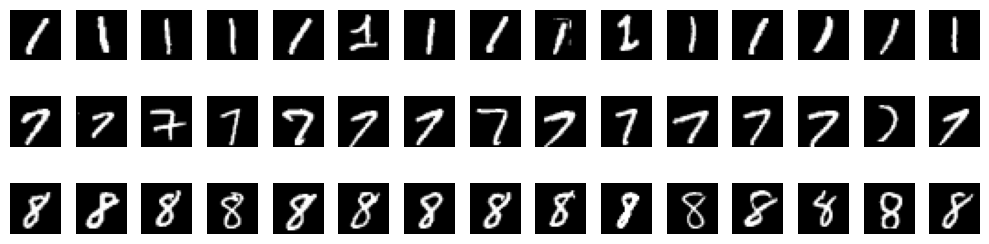

In [12]:
# Visualize some samples of the digits dataset
pl.figure(figsize=(10, 3))
for i in range(15):
    pl.subplot(3, 15, i + 1)
    image = x2[i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    pl.subplot(3, 15, i + 1 + 15)
    image = x2[1000 + i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    pl.subplot(3, 15, i + 1 + 2 * 15)
    image = x2[2000 + i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
pl.tight_layout()
pl.show()

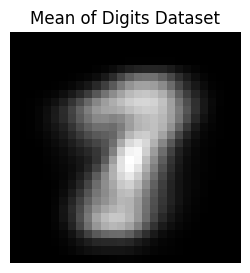

In [13]:
# Compute the mean image of the digits dataset
mean_digits = np.mean(x2, axis=0).reshape(28, 28)
pl.figure(figsize=(3, 3))
pl.imshow(mean_digits, cmap='gray')
pl.title('Mean of Digits Dataset')
pl.axis('off')
pl.show()

# 2) Predicting Diabetes on the Pima dataset:

# 2.1) Know the data:

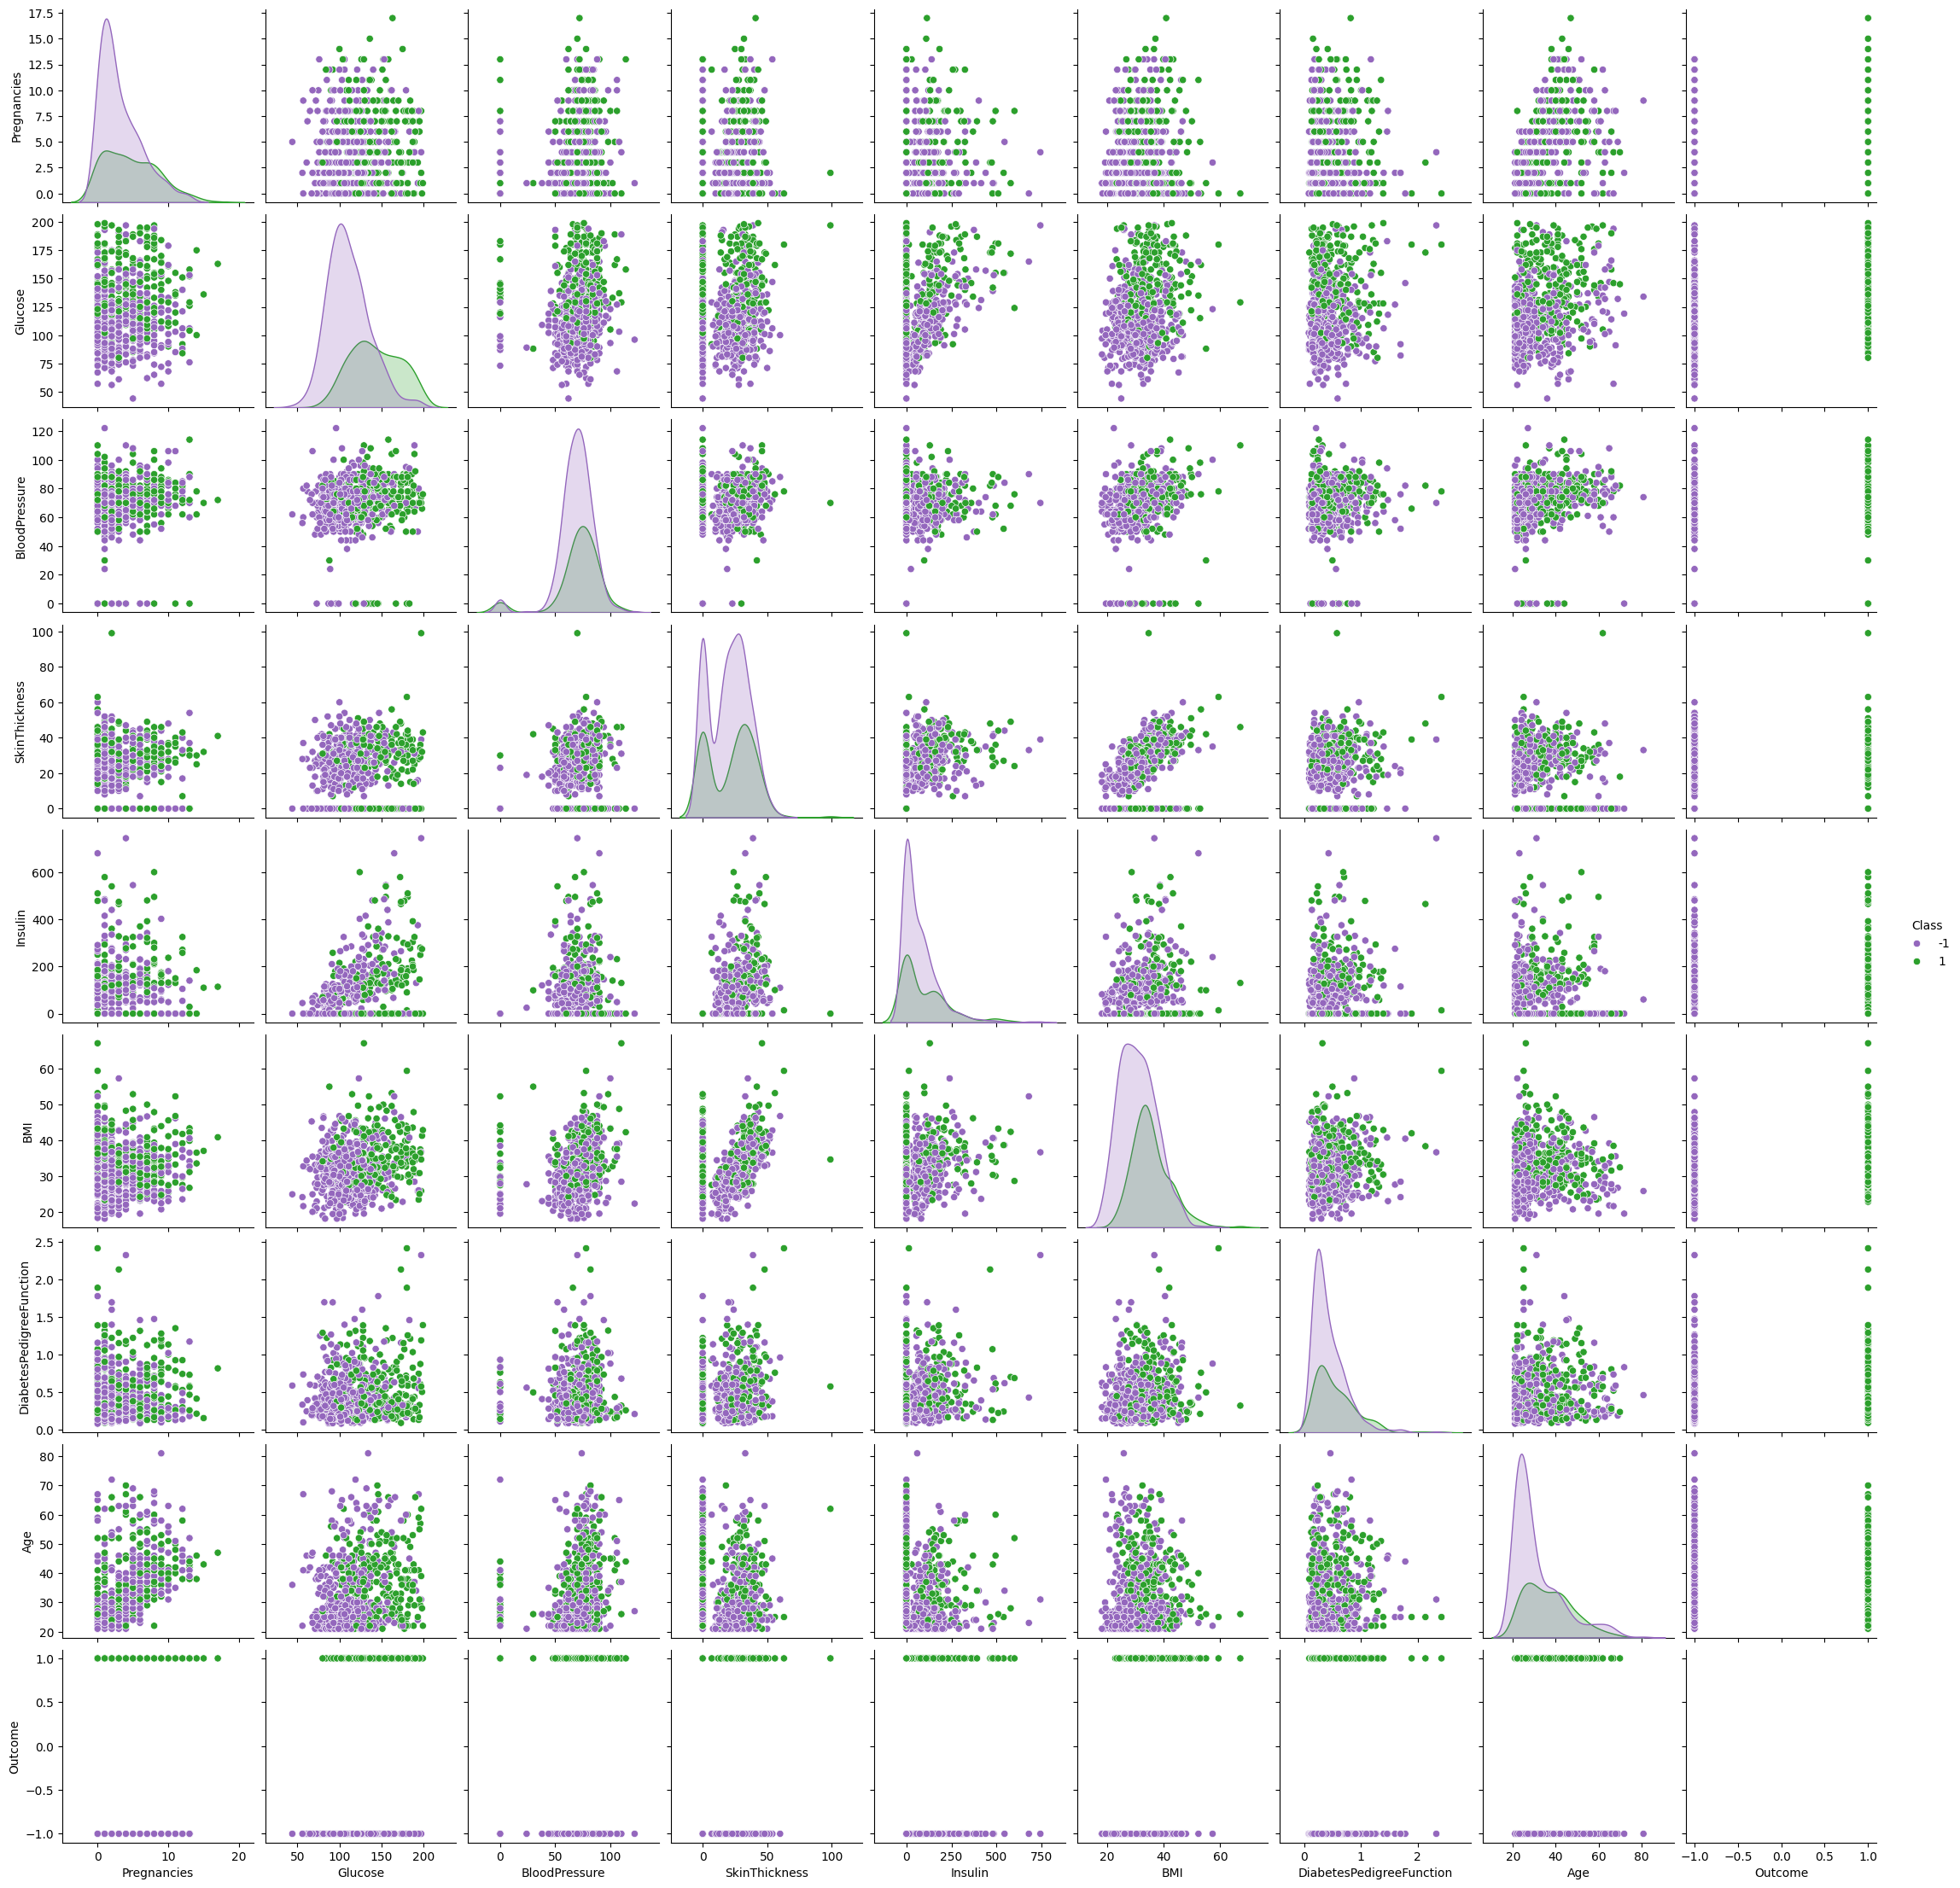

In [14]:
# Scatter plot between pairs of variables
import seaborn as sns
pima['Class']=y1.tolist()
sns.color_palette("tab10")
g = sns.pairplot(pima,hue='Class',palette=['tab:purple', 'tab:green'])
pl.show()

Glucose and BMI are the strongest predictors of diabetes in this dataset, which is consistant with the results of the correlation matrix.

We can clearly notice from the plots above that the two classes can be clearly separated according to the glucose variable. In fact, patients that have levels of gulcose that are lower than approximately 120 are classified as non-diabetic (label -1) and those that have levels of glucose that are higher than approximately 120 are classified as diabetic (label 1).

As for the BMI variable, we can also notice from the previous plots that patients with a body mass index that is lower than nearly 30 are non-diabetic patients while those with a BMI higher than 30 are diabetic patients.

From a medical perspective, the glucose level and the body mass index variables do make sense. 

In [15]:
# Split the data in training/test
n = 300
x_train, y_train = x1[:n, :], y1[:n]
x_test, y_test = x1[n:,:], y1[n:]

In [16]:
# Check the standard deviation of the training data
x_train.std(axis=0)

array([  3.32471553,  30.01834162,  17.89310078,  15.65371486,
       116.09784547,   7.28910298,   0.32931533,  10.84544144])

The features does not have the same variances/scaling as we can notice from this result.

Having variables with different scales and variances can indeed be problematic, especially in algorithms sensitive to feature magnitudes.In algorithms like logistic regression and neural networks, variables with larger scales may dominate the gradient updates, slowing down the learning process or leading to unstable models. This imbalance can prevent the model from converging or learning patterns from features with smaller scales. 

To address these issues, feature scaling methods like standardization (z-score normalization) or min-max scaling are commonly used to ensure all features contribute proportionally to the model.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Standardize the data
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# Check the standard deviation of the training data
x_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

# 2.2) Bayesian decision and linear classification:

**Linear Discriminant Analysis (LDA)**

In [20]:
# Train a Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_test, y_test)

LinearDiscriminantAnalysis()

In [21]:
# Compute its accuracy and AUC on the test data
accuracy_LDA = []
AUC_LDA = []

y_pred_LDA = LDA.predict(x_test)

accuracy_LDA.append(y_pred_LDA[y_pred_LDA == y_test].shape[0]/y_pred_LDA.shape[0])
print("LDA's accuracy is:", accuracy_LDA[-1]*100, '%')

AUC_LDA.append(roc_auc_score(y_test, LDA.predict_proba(x_test)[:, 1]))
print("LDA's AUC is:", AUC_LDA[-1])

LDA's accuracy is: 79.95110024449878 %
LDA's AUC is: 0.877858002406739


In [22]:
# Perform a cross validation
from sklearn.model_selection import GridSearchCV

parameters = {'solver':[ 'lsqr','eigen'],'shrinkage':['None', 'auto', 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

gridsearvch = GridSearchCV(LinearDiscriminantAnalysis(), parameters)
result = gridsearvch.fit(x_train, y_train)

In [23]:
LDA = LinearDiscriminantAnalysis(solver = result.best_params_['solver'], shrinkage = result.best_params_['shrinkage'] )

LDA.fit(x_train, y_train)

y_pred = LDA.predict(x_test)

accuracy_LDA.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("LDA's accuracy on pima dataset is:", accuracy_LDA[-1]*100, '%')

AUC_LDA.append(roc_auc_score(y_test, LDA.predict_proba(x_test)[:, 1]))
print("LDA's AUC on pima dataset is:", AUC_LDA[-1])

LDA's accuracy on pima dataset is: 79.46210268948656 %
LDA's AUC on pima dataset is: 0.8636637129416913


After performing the cross-validation for the parameters of the method shrinkage are very close to those obtained with the default parameters with an accuracy of nearly 79.5 % and a AUC score of nearly 0.86. Therefore, in this case, the validation doesn't lead to a better performance.

In [24]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_LDA = np.max(np.array(accuracy_LDA))
AUC_LDA = np.max(np.array(AUC_LDA))

**Quadratic Discriminant Analysis (QDA)**

In [25]:
# Train a Quadratic Discriminant Analysis (QDA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_test, y_test)

QuadraticDiscriminantAnalysis()

In [26]:
# Compute its accuracy and AUC on the test data
accuracy_QDA = []
AUC_QDA = []

y_pred = QDA.predict(x_test)

accuracy_QDA.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("QDA's accuracy is:", accuracy_QDA[-1]*100, '%')

# Computing the model's AUC score
AUC_QDA.append(roc_auc_score(y_test, QDA.predict_proba(x_test)[:, 1]))
print("QDA's AUC is:", AUC_QDA[-1])

QDA's accuracy is: 79.70660146699267 %
QDA's AUC is: 0.8672738212449403


The accuracy 79.70 % and AUC score 0.867 of the QDA's model with the parameters being set to their default, are slightly less than those obtained with the LDA's model with default parameters accuracy of 79.95 % and AUC score of 0.877. Therefore, the LDA's performance is slightly better than that of the QDA.

In [27]:
# Perform a cross validation
# Defining the parameters and possible values to perform cross-validation on
parameters = {'reg_param':list(np.arange(0, 3, 0.1))}

gridsearvch = GridSearchCV(QuadraticDiscriminantAnalysis(), parameters)
result = gridsearvch.fit(x_train, y_train)

In [28]:
QDA = QuadraticDiscriminantAnalysis(reg_param = result.best_params_['reg_param'])

QDA.fit(x_train, y_train)
y_pred = QDA.predict(x_test)

accuracy_QDA.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("QDA's accuracy is:", accuracy_QDA[-1]*100, '%')

AUC_QDA.append(roc_auc_score(y_test, QDA.predict_proba(x_test)[:, 1]))
print("QDA's AUC is:", AUC_QDA[-1])

QDA's accuracy is: 80.1955990220049 %
QDA's AUC is: 0.8566622907778143


We can notice from above that the obtained accuracy of 80.1 % and AUC score of 0.85 after performing the cross-validation for the parameters of the method reg_param are higher than those obtained with the default parameters. Also, the obtained performance for QDA is better than the LDA model with default parameters. Therefore, in the case of the QDA model, the validation has lead to a way better performance.

In [29]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_QDA = np.max(np.array(accuracy_QDA))
AUC_QDA = np.max(np.array(AUC_QDA))

**Gaussian Naive Bayes (NB)**

In [30]:
# Train a Gaussian Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [31]:
y_pred = NB.predict(x_test)

accuracy_NB = y_pred[y_pred == y_test].shape[0]/y_pred.shape[0]
print("NB's accuracy is:", accuracy_NB*100, '%')

AUC_NB = roc_auc_score(y_test, NB.predict_proba(x_test)[:, 1])
print("NB's AUC is:", AUC_NB)

NB's accuracy is: 76.77261613691931 %
NB's AUC is: 0.8310359916858113


Based on this result, the GNB classifier performs weakly with respect to both LDA and QDA classifiers. It has the lowest accuracy and AUC score so far.

**Logistic Regression**

In [32]:
# Train a Logistic regression classifier
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = LR.predict(x_test)

accuracy_LR = y_pred[y_pred == y_test].shape[0]/y_pred.shape[0]
print("LR's accuracy is:", accuracy_LR*100, '%')

AUC_LR = roc_auc_score(y_test, LR.predict_proba(x_test)[:, 1])
print("LR's AUC is:", AUC_LR)

LR's accuracy is: 79.46210268948656 %
LR's AUC is: 0.8648123837654522


Based on this result the LR classifier performs better than the GNB classifier, it has higher accuracy and score. LDA calssifier performs better than the LR classifier, also the QDA classifier performs better than LR classifier. However, the accuracy and AUC scorees of the three classifiers (LDA, QDA, LR) are very close.

In [34]:
# Perform a a cross validation
parameters = {'solver':['liblinear', 'saga'], 'C':list(np.logspace(-3, 5, 100))}

gridsearvch = GridSearchCV(LogisticRegression(penalty='l1'), parameters)
result = gridsearvch.fit(x_train, y_train)

In [35]:
# Train the model with the best parameters
LR = LogisticRegression(penalty='l1', solver=result.best_params_['solver'], C=result.best_params_['C'])
LR.fit(x_train, y_train)
y_pred_LR_L1 = LR.predict(x_test)

In [36]:
LR.coef_

array([[0.2186412 , 0.66906315, 0.        , 0.        , 0.        ,
        0.38903799, 0.22690122, 0.        ]])

The model is sparse, since half of the coefficients are set to zero and the other non-zero coefficients are shrinked using L1 penalization.

In [37]:
print("The variables removed from the model are:", varnames[LR.coef_.flatten()==0])

The variables removed from the model are: ['BloodPressure' 'SkinThickness' 'Insulin' 'Age']


In [38]:
# Computing the model's accuracy
accuracy_LR_L1 = y_pred_LR_L1[y_pred_LR_L1 == y_test].shape[0]/y_pred_LR_L1.shape[0]
print("LR's accuracy with L1 regularization is:", accuracy_LR_L1*100, '%')

# Computing the model's AUC score
AUC_LR_L1 = roc_auc_score(y_test, LR.predict_proba(x_test)[:, 1])
print("LR's AUC score is:", AUC_LR_L1)

LR's accuracy with L1 regularization is: 79.95110024449878 %
LR's AUC score is: 0.868914779564599


The model is performing well, both the accuracy and the AUC score are high.

Based on the results that we have obtained so far, the best model is the LDA classifier with default values. It has the highest accuracy and AUC score. Note that LDA and LR have very close values of accuracy and AUC score. On the other hand, the GNB has the lower accuracy and AUC score, but the QDA classifier performs well with values lower than the LDA classifier.

Therefore, the best model is linear (LAD,LR).

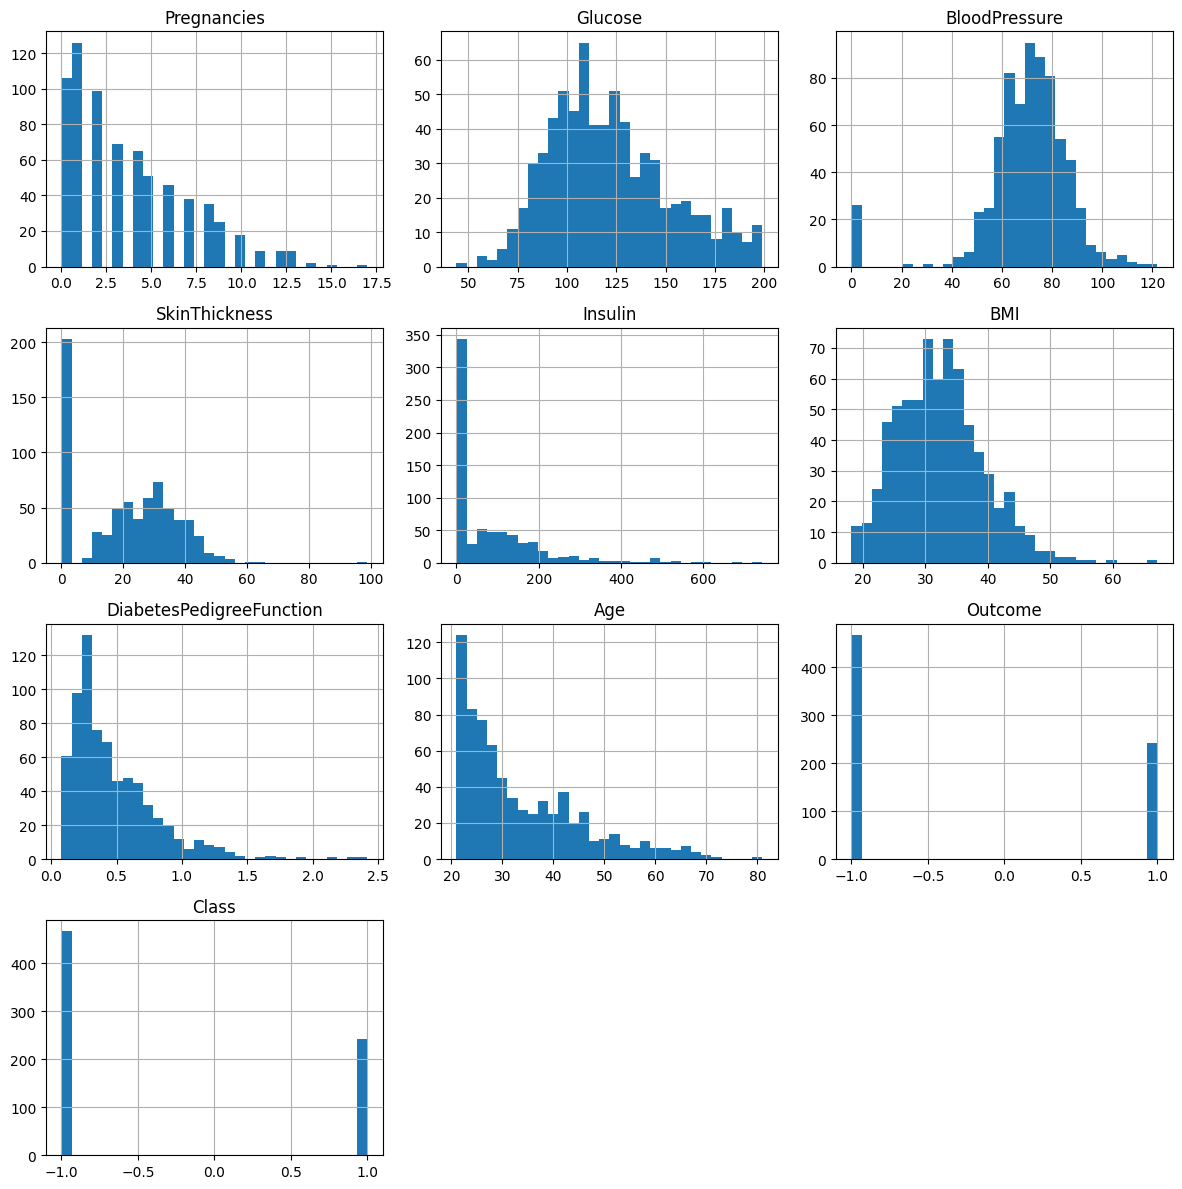

In [39]:
# Visualization of the pima dataset
pima.hist(figsize=(12,12), bins=30)
pl.tight_layout()

The separability is clearly present in the insulin, skin thickness and blood pressure plots. For instance, for the skin thickness variable, we can see that the patients can be separated into two groups: patients having a skin thickness of 0 and those having skin thickness higher than zero. As for the insulin variable, we can notice that the patients can also be separated into two groups: patients having an insulin level of 0 and those having an insulin level higher than zero. Same applies to the blood pressure plot.

As for the other variables, we don't clearly notice that the samples can be easily separated. In fact, they're more or less fairly distributes among all the values.

In [40]:
LDA.coef_

array([[ 0.51252271,  1.07562334, -0.07822621, -0.19318348, -0.32599967,
         0.78398462,  0.53811182, -0.0391561 ]])

The features having the highest effect are Glucose, BMI, DiabetesPedigreeFunction and Pregnancies. Other features (Blood pressure, skin thickness, insuline and age) have no influence when it comes to the risk of diabetes since their weights are nearly equal to zero. These same features were also dropped out and set to zero when performing Logistic Regression with L1 regularization, meaning that they aren't important when it comes to predicting whether or not a patient has diabetes.

From a medical point of view, since it is known that high levels of glucose, high levels of BMI, and family history when it comes to diabetes (DiabetesPedigreeFunction) are principal factors and causes of the diabetes. Pregnancies are also the cause of Gestational diabetes manifested in high blood sugar (glucose) that develops during pregnancy and usually disappears after giving birth.

# 2.3) Nonlinear methods:

**Random Forest Classifier**

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
# Test the performance with default parameters
y_pred = RF.predict(x_test)

accuracy_RF = y_pred[y_pred == y_test].shape[0]/y_pred.shape[0]
print("RF's accuracy is:", accuracy_RF*100, '%')

AUC_RF = roc_auc_score(y_test, RF.predict_proba(x_test)[:, 1])
print("RF's AUC is:", AUC_NB)

RF's accuracy is: 79.46210268948656 %
RF's AUC is: 0.8310359916858113


Training the model and predicting on the test dataset gives n accuracy of 77.99% and AUC score of 0.83. This results indicates that the RF classifier performs only better than the GNB classifier, while LDA, QDA, and LR performs better in term of the obtained accuracy and AUC score.

In [43]:
# Defining the parameters and possible values to perform cross-validation on
parameters = {'n_estimators':list(np.arange(100, 200, 10))}

gridsearvch = GridSearchCV(RandomForestClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

# Best performance and estimator
print('Best obtained performance is of', result.best_score_, 'for a number of estimators of', result.best_params_['n_estimators'])

Best obtained performance is of 0.7266666666666668 for a number of estimators of 130


In [44]:
rf = RandomForestClassifier(n_estimators=result.best_params_['n_estimators'])
# Fitting the model
rf.fit(x_train, y_train)

# Check the model's performance with best parameters
y_pred = rf.predict(x_test)

accuracy_rf = y_pred[y_pred == y_test].shape[0]/y_pred.shape[0]
print("RandomForest classifier's accuracy is:", accuracy_rf*100, '%')

AUC_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
print("RandomForest classifier's AUC score is:", AUC_rf)

RandomForest classifier's accuracy is: 80.68459657701712 %
RandomForest classifier's AUC score is: 0.8589733070780002


After performing the cross-validation for the parameters of the method n_estimators are close to those obtained with the default parameters.

**Support Vector Classifier**

In [45]:
# Support Vector Classifier
from sklearn.svm import SVC
# Train a Support Vector Classifier
svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [46]:
accuracy_svc=[]
AUC_svc =[]

# Test the performance with default parameters
y_pred = svc.predict(x_test)

accuracy_svc.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("SVC's accuracy is:", accuracy_svc[-1]*100, '%')

AUC_svc.append(roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1]))
print("SVC's AUC is:", AUC_svc[-1])

SVC's accuracy is: 78.72860635696821 %
SVC's AUC is: 0.8385023520402581


Based on this result, the SVC model performs less than LDA, QDA, and LR. However, it performs better than NB and RFC models.

In [47]:
# Validation of the Support Vector classifier's regularization parameter
parameters = {'C':list(np.logspace(-3, 5, 100))}

gridsearvch = GridSearchCV(SVC(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a C=', result.best_params_['C'])

Best obtained performance is of 0.7333333333333333 for a C= 0.22051307399030456


In [48]:
# Test the performance with best parameters
svc = SVC(C=result.best_params_['C'], probability=True)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

accuracy_svc.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("SVC classifier's accuracy is:", accuracy_svc[-1]*100, '%')

# Computing the model's AUC score
AUC_svc.append(roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1]))
print("SVC classifier's AUC score is:", AUC_svc[-1])

SVC classifier's accuracy is: 79.46210268948656 %
SVC classifier's AUC score is: 0.8418389672902308


In [49]:
# Validation of the Support Vector classifier's kernel parameter

parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

gridsearvch = GridSearchCV(SVC(), parameters)
result = gridsearvch.fit(x_train, y_train)

# Best performance and estimator
print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['kernel'], 'kernel')

Best obtained performance is of 0.75 for a sigmoid kernel


In [50]:
# Test the performance with best parameters
svc = SVC(kernel=result.best_params_['kernel'], probability=True)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

accuracy_svc.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("SVC classifier's accuracy is:", accuracy_svc[-1]*100, '%')

AUC_svc.append(roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1]))
print("SVC classifier's AUC score is:", AUC_svc[-1])

SVC classifier's accuracy is: 74.08312958435208 %
SVC classifier's AUC score is: 0.7827371184771907


In [51]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_svc = np.max(np.array(accuracy_svc))
AUC_svc = np.max(np.array(AUC_svc))

In the case of the support vector classifier, the validation of the regulaization parameter has lead to a slightly better performance. However, it's not the case for the validation of the kernel which has lead to a worse performance.

**MLP Classifier**

In [52]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
# Train a MLP Classifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

MLPClassifier()

In [53]:
accuracy_mlp = []
AUC_mlp = []

# Test the performance with default parameters
y_pred = svc.predict(x_test)

accuracy_mlp.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("MLP's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(y_test, mlp.predict_proba(x_test)[:, 1]))
print("MLP's AUC is:", AUC_mlp[-1])

MLP's accuracy is: 74.08312958435208 %
MLP's AUC is: 0.852915435947927


The performance of the MLP model is worse than the performance of the linear models, its accuracy and AUC score is less than those of the linear models.

In [54]:
# Validation of the MLP classifier's solver parameter
parameters = {'solver':['lbfgs', 'sgd', 'adam']}

gridsearvch = GridSearchCV(MLPClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['solver'], 'solver')

Best obtained performance is of 0.7533333333333333 for a sgd solver


In [55]:
mlp = MLPClassifier(solver=result.best_params_['solver'])
# Fitting the model
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

accuracy_mlp.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("MLP classifier's accuracy is:", accuracy_mlp[-1]*100, '%')

# Computing the model's AUC score
AUC_mlp.append(roc_auc_score(y_test, mlp.predict_proba(x_test)[:, 1]))
print("MLP classifier's AUC score is:", AUC_mlp[-1])

MLP classifier's accuracy is: 78.97310513447434 %
MLP classifier's AUC score is: 0.865687561535937


The variation of the calssifier's solver increased the accuracy of the model from 0.7408 to 78.48, which is considered a hight change.

In [56]:
# Validation of the MLP classifier's hidden layer sizes parameter
parameters = {'hidden_layer_sizes':list(np.arange(100, 500, 100))}

gridsearvch = GridSearchCV(MLPClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a hidden layer size of', result.best_params_['hidden_layer_sizes'])

Best obtained performance is of 0.7366666666666667 for a hidden layer size of 200


In [57]:
mlp = MLPClassifier(hidden_layer_sizes=result.best_params_['hidden_layer_sizes'])

mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

accuracy_mlp.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("MLP classifier's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(y_test, mlp.predict_proba(x_test)[:, 1]))
print("MLP classifier's AUC score is:", AUC_mlp[-1])

MLP classifier's accuracy is: 77.75061124694376 %
MLP classifier's AUC score is: 0.8400612624439339


Changing the hidden layer size result in a better performanace and accuracy, the accuracy is increased from 0.7408 to 78.72.

In [58]:
# Validation of the MLP classifier's alpha parameter
parameters = {'alpha':list(np.logspace(-3, 1, 10))}

gridsearvch = GridSearchCV(MLPClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a alpha of', result.best_params_['alpha'])

Best obtained performance is of 0.7533333333333333 for a alpha of 3.593813663804626


In [59]:
mlp = MLPClassifier(alpha=result.best_params_['alpha'])

mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

accuracy_mlp.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("MLP classifier's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(y_test, mlp.predict_proba(x_test)[:, 1]))
print("MLP classifier's AUC score is:", AUC_mlp[-1])

MLP classifier's accuracy is: 79.21760391198043 %
MLP classifier's AUC score is: 0.8689694781752543


Changing the strength of the L2 regularization term result in a better performanace and accuracy, the accuracy is increased from 0.7408 to 78.97.

In [60]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_mlp = np.max(np.array(accuracy_mlp))
AUC_mlp = np.max(np.array(AUC_mlp))

**Gradient Boosting Classifier**

In [61]:
# GB Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [62]:
accuracy_gb = []
AUC_gb = []

# Test the performance with default parameters
y_pred = gb.predict(x_test)

accuracy_gb.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("GB's accuracy is:", accuracy_gb[-1]*100, '%')

AUC_gb.append(roc_auc_score(y_test, gb.predict_proba(x_test)[:, 1]))
print("GB's AUC is:", AUC_gb[-1])

GB's accuracy is: 76.03911980440098 %
GB's AUC is: 0.8270976917186303


We notice from the above that the obtained accuracy and AUC score of the logistic regression model with default parameters of 75.5% and 0.82 respectively are less than those obtained with the LDA and LR models with default parameters. Thus, the performance of the gradient boosting classifier is worse than those of the linear estimators.

In [63]:
# Validation of the GradientBoosting classifier's loss parameter
parameters = {'loss':['log_loss', 'deviance', 'exponential']}

gridsearvch = GridSearchCV(GradientBoostingClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['loss'], 'loss')

Best obtained performance is of 0.7033333333333334 for a exponential loss


In [64]:
gb = GradientBoostingClassifier(loss=result.best_params_['loss']) 

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

accuracy_gb.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("GradientBoosting's accuracy is:", accuracy_gb[-1]*100, '%')

# Computing the model's AUC score
AUC_gb.append(roc_auc_score(y_test, gb.predict_proba(x_test)[:, 1]))
print("GradientBoosting's AUC score is:", AUC_gb[-1])

GradientBoosting's accuracy is: 75.79462102689487 %
GradientBoosting's AUC score is: 0.830434306968603


The variation of the classifier's loss parameter does not change the accuracy and the AUC score, the results are close with default parameters.

In [65]:
# Validation of the GradientBoosting classifier's learning rate parameter
parameters = {'learning_rate':list(np.arange(0, 1, 0.1))}

gridsearvch = GridSearchCV(GradientBoostingClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a learning rate of', result.best_params_['learning_rate'])

Best obtained performance is of 0.6866666666666665 for a learning rate of 0.5


In [66]:
gb = GradientBoostingClassifier(learning_rate=result.best_params_['learning_rate']) 
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

accuracy_gb.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("GradientBoosting's accuracy is:", accuracy_gb[-1]*100, '%')

AUC_gb.append(roc_auc_score(y_test, gb.predict_proba(x_test)[:, 1]))
print("GradientBoosting's AUC score is:", AUC_gb[-1])

GradientBoosting's accuracy is: 76.77261613691931 %
GradientBoosting's AUC score is: 0.8272891368559239


The variation of the classifier's learning rate leads to better reuslts in terms of accuracy, the accuracy is increased when we choose a learning rate of 0.5.

In [67]:
# Validation of the GradientBoosting classifier's number of estimators parameter
parameters = {'n_estimators':list(np.arange(1, 300, 100))}

gridsearvch = GridSearchCV(GradientBoostingClassifier(), parameters)
result = gridsearvch.fit(x_train, y_train)

print('Best obtained performance is of', result.best_score_, 'for a number of estimators of', result.best_params_['n_estimators'])

Best obtained performance is of 0.6866666666666666 for a number of estimators of 101


In [68]:
gb = GradientBoostingClassifier(n_estimators=result.best_params_['n_estimators']) 
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

accuracy_gb.append(y_pred[y_pred == y_test].shape[0]/y_pred.shape[0])
print("GradientBoosting's accuracy is:", accuracy_gb[-1]*100, '%')

AUC_gb.append(roc_auc_score(y_test, gb.predict_proba(x_test)[:, 1]))
print("GradientBoosting's AUC score is:", AUC_gb[-1])

GradientBoosting's accuracy is: 76.03911980440098 %
GradientBoosting's AUC score is: 0.8274532326878896


The variation of the number of estimators used leads to a slightly better accuracy.

In [69]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_gb = np.max(np.array(accuracy_gb))
AUC_gb = np.max(np.array(AUC_gb))

# 2.4) Comparison and interpretation:

In [70]:
# Store the results in a DataFrame
models = ["LDA", "QDA", "NB", "LR_L1", "RF", "SVC", "MLP", "GB"]

accuracy = [accuracy_LDA, accuracy_QDA, accuracy_NB, accuracy_LR_L1, accuracy_rf, accuracy_svc, accuracy_mlp, accuracy_gb]
AUC = [AUC_LDA, AUC_QDA, AUC_NB, AUC_LR_L1, AUC_rf, AUC_svc, AUC_mlp, AUC_gb]

df = pd.DataFrame({
    "Accuracy": accuracy,
    "AUC Score": AUC
}, index=models)

In [71]:
df

,Accuracy,AUC Score
LDA,0.799511,0.877858
QDA,0.801956,0.867274
NB,0.767726,0.831036
LR_L1,0.799511,0.868915
RF,0.806846,0.858973
SVC,0.794621,0.841839
MLP,0.792176,0.868969
GB,0.767726,0.830434


A good compromise might be LDA since it offers a strong AUC and high accuracy. QDA has the highest Accuracy (0.801956), while LDA has the highest AUC Score (0.877858).

LDA and QDA typically perform well in linear, Gaussian-distributed data, so their high scores are logical if this assumption roughly holds in the data.

Random Forest (RF) and Gradient Boosting (GB) often excel in capturing complex patterns, but their slightly lower scores could indicate that this dataset is not overly complex or nonlinear, thus favoring simpler models.

LDA, with the highest AUC (0.877858), might be most suitable. Its strength in linear relationships is advantageous, especially if the data largely fits a Gaussian distribution, as is common in many biomedical datasets.

For diabetes, where both false positives and false negatives carry risks, optimizing AUC is essential. The model with the highest AUC score (like LDA here) is typically a strong choice, though running tests on RF and GB can confirm if they capture additional non-linear nuances in the data.

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

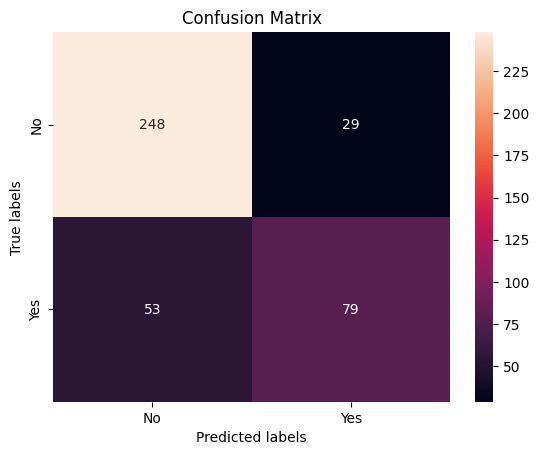

In [72]:
# Confusion matrix of the best model
from sklearn.metrics import confusion_matrix

C_matrix = confusion_matrix(y_test, y_pred_LDA)
ax= pl.subplot()
sns.heatmap(C_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [73]:
FNR = 100 * C_matrix[1, 0]/(C_matrix[1, 0] + C_matrix[1, 1])
print('The False negative rate for the test data is', FNR, '%')

The False negative rate for the test data is 40.15151515151515 %


A 40% false negative rate in a diabetes classification task is quite high and generally not acceptable in medical applications.

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

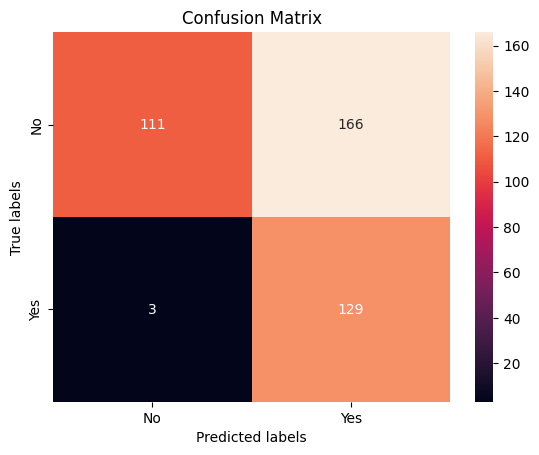

In [74]:
# Manually changing the intercept
LDA.intercept_ = 1.2

y_pred_new = LDA.predict(x_test)

C_matrix = confusion_matrix(y_test, y_pred_new)
ax= pl.subplot()
sns.heatmap(C_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [75]:
FNR = 100 * C_matrix[1, 0]/(C_matrix[1, 0] + C_matrix[1, 1])
print('The new False negative rate for the test data is', FNR, '%')

The new False negative rate for the test data is 2.272727272727273 %


We can notice that as we increase the weight of the intercept the False negative rate is decreased.

# 3) Predicting Classes on the Digits dataset:

# 3.1) Evaluate the different supervised methods:

**Linear Discriminant Analysis**

In [76]:
# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x2, y2)

LinearDiscriminantAnalysis()

In [77]:
# Compute its accuracy and AUC on the test data
accuracy_LDA = []
AUC_LDA = []

y_pred = LDA.predict(xt2)

accuracy_LDA.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("LDA's accuracy is:", accuracy_LDA[-1]*100, '%')

AUC_LDA.append(roc_auc_score(yt2, LDA.predict_proba(xt2), multi_class='ovr'))
print("LDA's AUC score is:", AUC_LDA[-1])

LDA's accuracy is: 93.33333333333333 %
LDA's AUC score is: 0.9816526666666666


In [78]:
# Validation of the LDA's shrinkage and solver parameters
parameters = {'solver':[ 'lsqr','eigen'],'shrinkage':['None', 'auto', 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# Defining the cross-validation model
gridsearvch = GridSearchCV(LinearDiscriminantAnalysis(), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a shrinkage of', result.best_params_['shrinkage'], 'and a', result.best_params_['solver'], 'solver.')

Best obtained performance is of 0.9573333333333334 for a shrinkage of 0.8 and a lsqr solver.


In [79]:
# Train the model with the best parameters
LDA = LinearDiscriminantAnalysis(solver = result.best_params_['solver'], shrinkage = result.best_params_['shrinkage'] )

LDA.fit(x2, y2)
y_pred = LDA.predict(xt2)

# Computing the model's accuracy
accuracy_LDA.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("LDA's accuracy is:", accuracy_LDA[-1]*100, '%')

AUC_LDA.append(roc_auc_score(yt2, LDA.predict_proba(xt2), multi_class='ovr'))
print("LDA's AUC score is:", AUC_LDA[-1])

LDA's accuracy is: 94.06666666666666 %
LDA's AUC score is: 0.9945866666666666


In [80]:
# Retreiving the maxiumum accuracy 
accuracy_LDA = np.max(np.array(accuracy_LDA))
AUC_LDA = np.max(np.array(AUC_LDA))

**Logistic Regression**

In [81]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(x2, y2)

LogisticRegression()

In [82]:
# Compute its accuracy and AUC on the test data
accuracy_LR = []
AUC_LR = []

y_pred = LR.predict(xt2)

accuracy_LR.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("LR's accuracy is:", accuracy_LR[-1]*100, '%')

AUC_LR.append(roc_auc_score(yt2, LR.predict_proba(xt2), multi_class='ovr'))
print("LR's AUC score is:", AUC_LR[-1])

LR's accuracy is: 96.46666666666667 %
LR's AUC score is: 0.9974333333333334


In [83]:
# Validation of the logistic regression's solver parameter
parameters = {'solver':['liblinear', 'saga']}

gridsearvch = GridSearchCV(LogisticRegression(penalty='l1'), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['solver'], 'solver.')

Best obtained performance is of 0.9756666666666668 for a saga solver.


In [84]:
solver = result.best_params_['solver']

LR = LogisticRegression(penalty='l1', solver=solver)

LR.fit(x2, y2)
y_pred_LR_L1 = LR.predict(xt2)


accuracy_LR.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("LR's accuracy on digits dataset is:", accuracy_LR[-1]*100, '%')

AUC_LR.append(roc_auc_score(yt2, LR.predict_proba(xt2), multi_class='ovr'))
print("LR's AUC score on the digits dataset is:", AUC_LR[-1])

LR's accuracy on digits dataset is: 96.46666666666667 %
LR's AUC score on the digits dataset is: 0.997328


In [85]:
# Validation of the logistic regression's regularization parameter
parameters = {'C':list(np.logspace(-3, 2, 10))}

gridsearvch = GridSearchCV(LogisticRegression(penalty='l1', solver='saga'), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a regularization parameter of', result.best_params_['C'])

Best obtained performance is of 0.9766666666666668 for a regularization parameter of 2.1544346900318843


In [86]:
C = result.best_params_['C']

LR = LogisticRegression(penalty='l1', solver=solver, C=C)

LR.fit(x2, y2)
y_pred_LR_L1 = LR.predict(xt2)

accuracy_LR.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("LR's accuracy on digits dataset is:", accuracy_LR[-1]*100, '%')

AUC_LR.append(roc_auc_score(yt2, LR.predict_proba(xt2), multi_class='ovr'))
print("LR's AUC score on the digits dataset is:", AUC_LR[-1])

LR's accuracy on digits dataset is: 96.46666666666667 %
LR's AUC score on the digits dataset is: 0.99735


In [87]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_lr = np.max(np.array(accuracy_LR))
AUC_lr = np.max(np.array(AUC_LR))

**Support Vector Classifier**

In [88]:
# Support Vector Classifier
svc = SVC(probability=True)
svc.fit(x2, y2)

SVC(probability=True)

In [89]:
accuracy_svc = []
AUC_SVC = []

# Test the performance with default parameters
y_pred = svc.predict(xt2)

accuracy_svc.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("SVC's accuracy is:", accuracy_svc[-1]*100, '%')

AUC_SVC.append(roc_auc_score(yt2, svc.predict_proba(xt2), multi_class='ovr'))
print("SVC's AUC is:", AUC_SVC[-1])

SVC's accuracy is: 98.33333333333333 %
SVC's AUC is: 0.9994339999999999


In [90]:
# Validation of the SVC's regularization parameter parameter
parameters = {'C':list(np.logspace(-3, 2, 10))}

gridsearvch = GridSearchCV(SVC(), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a C=', result.best_params_['C'])

Best obtained performance is of 0.991 for a C= 7.742636826811277


In [91]:
svc = SVC(C=result.best_params_['C'], probability=True)

svc.fit(x2, y2)
y_pred = svc.predict(xt2)

accuracy_svc.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("SVC's accuracy is:", accuracy_svc[-1]*100, '%')

AUC_SVC.append(roc_auc_score(yt2, svc.predict_proba(xt2), multi_class='ovr'))
print("SVC's AUC score is:", AUC_SVC[-1])

SVC's accuracy is: 98.33333333333333 %
SVC's AUC score is: 0.9995159999999998


In [92]:
# Validation of the SVC's kernel parameter
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

gridsearvch = GridSearchCV(SVC(), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['kernel'], 'kernel')

Best obtained performance is of 0.9870000000000001 for a rbf kernel


In [93]:
svc = SVC(kernel=result.best_params_['kernel'], probability=True)

svc.fit(x2, y2)
y_pred = svc.predict(xt2)

accuracy_svc.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("SVC's accuracy is:", accuracy_svc[-1]*100, '%')

AUC_SVC.append(roc_auc_score(yt2, svc.predict_proba(xt2), multi_class='ovr'))
print("SVC's AUC score is:", AUC_SVC[-1])

SVC's accuracy is: 98.33333333333333 %
SVC's AUC score is: 0.9994179999999999


In [94]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_svc = np.max(np.array(accuracy_svc))
AUC_svc = np.max(np.array(AUC_SVC))

**MLP Classifier**

In [95]:
# MLP Classifier
mlp = MLPClassifier()
mlp.fit(x2, y2)

MLPClassifier()

In [96]:
# Compute its accuracy and AUC on the test data
accuracy_mlp = []
AUC_mlp = []

y_pred = mlp.predict(xt2)

accuracy_mlp.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("MLP's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(yt2, mlp.predict_proba(xt2), multi_class='ovr'))
print("MLP's AUC is:", AUC_mlp[-1])

MLP's accuracy is: 98.06666666666666 %
MLP's AUC is: 0.9984806666666667


In [97]:
# Validation of the MLP classifier's solver parameter
parameters = {'solver':['lbfgs', 'sgd', 'adam']}

gridsearvch = GridSearchCV(MLPClassifier(), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a', result.best_params_['solver'], 'solver')

Best obtained performance is of 0.9833333333333332 for a adam solver


In [98]:
mlp = MLPClassifier(solver=result.best_params_['solver'])

mlp.fit(x2, y2)
y_pred = mlp.predict(xt2)

accuracy_mlp.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("MLP classifier's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(yt2, mlp.predict_proba(xt2), multi_class='ovr'))
print("MLP Classifier's AUC score is:", AUC_mlp[-1])

MLP classifier's accuracy is: 98.13333333333333 %
MLP Classifier's AUC score is: 0.998274


In [99]:
# Validation of the MLP classifier's hidden layer sizes parameter
parameters = {'hidden_layer_sizes':list(np.arange(100, 500, 100))}

gridsearvch = GridSearchCV(MLPClassifier(), parameters)
result = gridsearvch.fit(x2, y2)

print('Best obtained performance is of', result.best_score_, 'for a hidden layer size of', result.best_params_['hidden_layer_sizes'])

Best obtained performance is of 0.9880000000000001 for a hidden layer size of 400


In [100]:
mlp = MLPClassifier(hidden_layer_sizes=result.best_params_['hidden_layer_sizes'])

mlp.fit(x2, y2)
y_pred = mlp.predict(xt2)

accuracy_mlp.append(y_pred[y_pred == yt2.flatten()].shape[0]/y_pred.shape[0])
print("MLP classifier's accuracy is:", accuracy_mlp[-1]*100, '%')

AUC_mlp.append(roc_auc_score(yt2, mlp.predict_proba(xt2), multi_class='ovr'))
print("MLP Classifier's AUC score is:", AUC_mlp[-1])

MLP classifier's accuracy is: 98.4 %
MLP Classifier's AUC score is: 0.9987346666666667


In [101]:
# Retreiving the maxiumum accuracy and AUC score
accuracy_mlp = np.max(np.array(accuracy_mlp))
AUC_mlp = np.max(np.array(AUC_mlp))

In [102]:
# Store the results in a DataFrame
models = ["LDA", "LR", "SVC", "MLP"]

accuracy = [accuracy_LDA, accuracy_lr, accuracy_svc, accuracy_mlp]
AUC = [AUC_LDA, AUC_lr, AUC_svc, AUC_mlp]

df = pd.DataFrame({
    "Accuracy": accuracy,
    "AUC Score": AUC
}, index=models)

In [103]:
df

,Accuracy,AUC Score
LDA,0.940667,0.994587
LR,0.964667,0.997433
SVC,0.983333,0.999516
MLP,0.984000,0.998735


# 3.2) Interpreting the classifier:

From the above table, we can conclude that SVC and MLP models are the best models. I will choose the MLP model as the best model since it has the highest accuracy and AUC score.

In [104]:
mlp = MLPClassifier(hidden_layer_sizes=result.best_params_['hidden_layer_sizes'])

mlp.fit(x2, y2)
y_pred = mlp.predict(xt2)

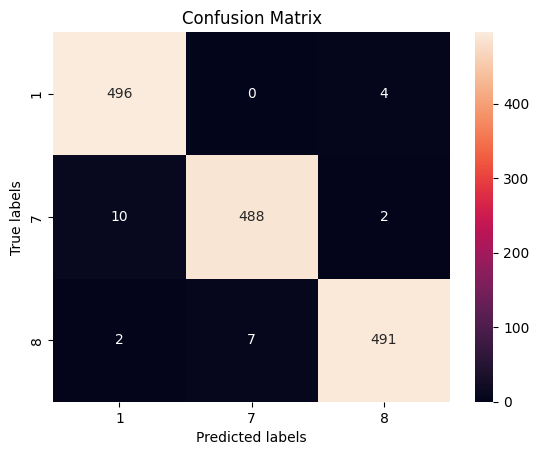

In [105]:
# Computing the model's confusion matrix
C_matrix = confusion_matrix(yt2, y_pred)

ax= pl.subplot()
sns.heatmap(C_matrix, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '7','8']); ax.yaxis.set_ticklabels(['1', '7','8']);

In [106]:
# Computing the False negative rate of the first class
FNR = 100 * (C_matrix[0, 2] + C_matrix[0, 1])/(C_matrix[0, 0] + C_matrix[0, 1] + C_matrix[0, 2])
print('The False negative rate of the 1 class is', FNR, '%')

The False negative rate of the 1 class is 0.8 %


In [107]:
# Computing the False negatives rate of the second class
FNR = 100 * (C_matrix[1, 2] + C_matrix[1, 0])/(C_matrix[1, 0] + C_matrix[1, 1] + C_matrix[1, 2])
print('The False negative rate of the 7 class is', FNR, '%')

The False negative rate of the 7 class is 2.4 %


In [108]:
# Computing the False negative rate of the third class
FNR = 100 * (C_matrix[2, 0] + C_matrix[2, 1])/(C_matrix[2, 0] + C_matrix[2, 1] + C_matrix[2, 2])
print('The False negative rate of the 8 class is', FNR, '%')

The False negative rate of the 8 class is 1.8 %


Therefore, we can deduce from the above that the second class is the most difficult to recognize since it has the highest false negative percentage of 2.4%. However, the first and third classes are the easiest to classify since they have the lowest false negative percentage.

In [109]:
# Computing the indices of the misclassified digits
id_misclassified = np.argwhere(yt2.flatten() != y_pred)

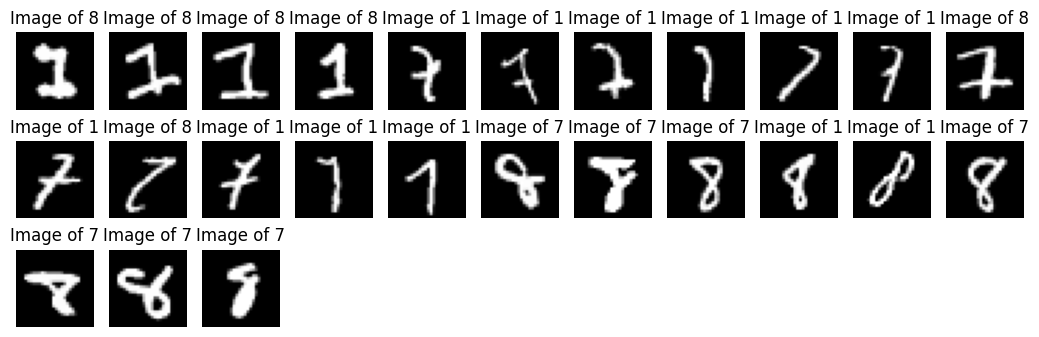

In [110]:
# Visualization of the misclassified digits 
pl.figure(figsize=(13, 4))

for i,j in enumerate(id_misclassified.flatten()) :
    pl.subplot(3,11,i+1)
    pl.imshow(xt2[j,:].reshape(28,28), cmap="gray")
    title = "Image of " + str(y_pred[j])
    pl.title(title)
    pl.axis("off")
pl.show()

The digits in the first five images in the first row are clearly 1 but they are classified by 8. We can see also in  the same row how 7 images are classified as 1, this is because due to the tick in the middle. 

Among these images there is at most 5 images that may be not very easy to classify.

In [135]:
import random

# Randomly choosing a well classified sample
index = np.random.choice(np.argwhere(yt2.flatten() == y_pred).flatten())

sample = []
y_sample = np.ones(1000)*yt2[index]

# Creating 1000 noisy samples of a random well classified sample   
for i in range(1000):
    sample.append(xt2[index, :] + 0.4*np.random.normal(size=[784,]))

# Prediction of the noisy samples with MLP classifier
y_pred_sample_mlp = mlp.predict(sample)

# Computing the models' accuracy
mlp_accuracy = (y_pred_sample_mlp[y_pred_sample_mlp == y_sample].shape[0]/y_pred_sample_mlp.shape[0])
print("MLP classifier's accuracy on the noisy samples is:", mlp_accuracy*100, '%')

MLP classifier's accuracy on the noisy samples is: 92.5 %


(-0.5, 27.5, 27.5, -0.5)

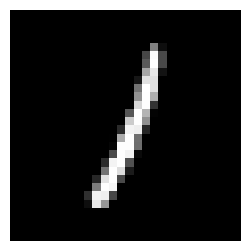

In [136]:
# Visualization of the original sample
pl.figure(figsize=(3,3))

pl.imshow(xt2[index, :].reshape(28,28), cmap="gray")
pl.axis('off')

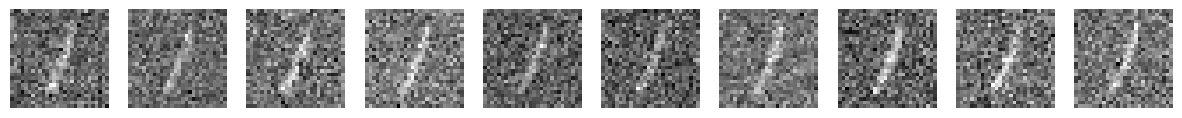

In [137]:
# Visualization of the noisy samples 
pl.figure(figsize=(15,3))

for i in range(10) :
    pl.subplot(1,10,i+1)
    pl.imshow(np.array(sample)[random.randint(0, 1000),:].reshape(28,28), cmap="gray")
    pl.axis("off")
pl.show()

The noisy samples are still more or less hardly recognizable. Therefore, predicting on these noisy samples would lead to an accuracy of 92.5% with a MLP classifier. Thus, we can conclude that the MLP classifier is a robust model since with a relatively high noise level (noisy samples barely recognizable), the model is still able to correctly predict the digit with a high accuracy of.

# Personal Discussion:

Implementing both linear and non-linear classifiers like Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) presented some challenges, particularly when aiming to improve model performance through cross-validation and parameter tuning. However, it was rewarding to see how fine-tuning these parameters could significantly impact other models performance.

Cross-validation techniques proved invaluable in obtaining reliable performance estimates, underscoring the importance of regularizing model evaluation to prevent overfitting. In future projects, I’ll incorporate these methods more rigorously to ensure model robustness.

Working with both the Pima diabetes dataset and MNIST digits allowed me to observe how different models perform across varied data types. While linear models like LDA and QDA were effective for diabetes classification, non-linear models like Random Forest and Gradient Boosting excelled with the complex MNIST dataset. This contrast clarified the strengths and limitations of each model type, especially in real-world applications like medical diagnostics and image recognition.

Overall, this lab equipped me with practical skills in applying diverse classification techniques and evaluating their performance—a critical foundation for future data science and machine learning projects.